In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime, timedelta

In [2]:
# dataset loading and preparation
df = pd.read_csv('aviation_data.csv')

In [3]:
df.shape

(12, 7)

In [4]:
df.head()

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 AM,American Airlines,15.0
1,DL5678,09/01/2023,01:15 PM,09/01/2023,03:30 PM,Delta,5.0
2,UA9101,09/01/2023,05:00 PM,09/01/2023,07:15 PM,United Airlines,25.0
3,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 PM,American Airlines,30.0
4,DL5678,09/02/2023,02:00 PM,09/02/2023,04:10 PM,Delta,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FlightNumber   12 non-null     object 
 1   DepartureDate  12 non-null     object 
 2   DepartureTime  12 non-null     object 
 3   ArrivalDate    12 non-null     object 
 4   ArrivalTime    12 non-null     object 
 5   Airline        12 non-null     object 
 6   DelayMinutes   10 non-null     float64
dtypes: float64(1), object(6)
memory usage: 804.0+ bytes


In [6]:
df.isnull().sum()

FlightNumber     0
DepartureDate    0
DepartureTime    0
ArrivalDate      0
ArrivalTime      0
Airline          0
DelayMinutes     2
dtype: int64

## Few conclusions:
### 1. Missing values in DelayMinutes column
### 2. Since the dataset is small, a good way to fill in the missing DelayMinutes values is to use the median delay for each airline.
### 3. Many columns have inappropriate data types

## Required Actions:
- ### Create a copy of the dataset to experiment without affecting the original data.
- ### Merge DepartureDate with DepartureTime and ArrivalDate with ArrivalTime, then drop unnecessary columns for easier analysis of flight duration, delays, and trends.

In [7]:
# creating another copy of dataset
df_copy = df.copy()

In [8]:
df_copy.head()

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 AM,American Airlines,15.0
1,DL5678,09/01/2023,01:15 PM,09/01/2023,03:30 PM,Delta,5.0
2,UA9101,09/01/2023,05:00 PM,09/01/2023,07:15 PM,United Airlines,25.0
3,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 PM,American Airlines,30.0
4,DL5678,09/02/2023,02:00 PM,09/02/2023,04:10 PM,Delta,NaN


In [9]:
# Combine date and time into a single datetime column for both departure and arrival
df['DepartureDatetime'] = pd.to_datetime(df['DepartureDate'] + ' ' + df['DepartureTime'])
df['ArrivalDatetime'] = pd.to_datetime(df['ArrivalDate'] + ' ' + df['ArrivalTime'])

# Drop the separate date and time columns if no longer needed
df = df.drop(columns=['DepartureDate', 'DepartureTime', 'ArrivalDate', 'ArrivalTime'])

# Display the DataFrame with the new datetime columns
df

,FlightNumber,Airline,DelayMinutes,DepartureDatetime,ArrivalDatetime
0,AA1234,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00
1,DL5678,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00
2,UA9101,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00
3,AA1234,American Airlines,30.0,2023-09-01 08:30:00,2023-09-01 22:45:00
4,DL5678,Delta,NaN,2023-09-02 14:00:00,2023-09-02 16:10:00
5,UA9101,United Airlines,20.0,2023-09-02 17:00:00,2023-09-02 19:15:00
6,AA1234,American Airlines,60.0,2023-09-02 20:30:00,2023-09-03 10:45:00
7,DL5678,Delta,10.0,2023-09-03 13:00:00,2023-09-03 15:30:00
8,UA9101,United Airlines,NaN,2023-09-03 15:00:00,2023-09-03 17:20:00
9,AA1234,American Airlines,15.0,2023-09-03 08:30:00,2023-09-03 10:00:00


In [10]:
# rearranging the columns for better readability
df = df[['FlightNumber', 'Airline', 'DepartureDatetime', 'ArrivalDatetime', 'DelayMinutes']]

In [11]:
df

,FlightNumber,Airline,DepartureDatetime,ArrivalDatetime,DelayMinutes
0,AA1234,American Airlines,2023-09-01 08:30:00,2023-09-01 10:45:00,15.0
1,DL5678,Delta,2023-09-01 13:15:00,2023-09-01 15:30:00,5.0
2,UA9101,United Airlines,2023-09-01 17:00:00,2023-09-01 19:15:00,25.0
3,AA1234,American Airlines,2023-09-01 08:30:00,2023-09-01 22:45:00,30.0
4,DL5678,Delta,2023-09-02 14:00:00,2023-09-02 16:10:00,NaN
5,UA9101,United Airlines,2023-09-02 17:00:00,2023-09-02 19:15:00,20.0
6,AA1234,American Airlines,2023-09-02 20:30:00,2023-09-03 10:45:00,60.0
7,DL5678,Delta,2023-09-03 13:00:00,2023-09-03 15:30:00,10.0
8,UA9101,United Airlines,2023-09-03 15:00:00,2023-09-03 17:20:00,NaN
9,AA1234,American Airlines,2023-09-03 08:30:00,2023-09-03 10:00:00,15.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FlightNumber       12 non-null     object        
 1   Airline            12 non-null     object        
 2   DepartureDatetime  12 non-null     datetime64[ns]
 3   ArrivalDatetime    12 non-null     datetime64[ns]
 4   DelayMinutes       10 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 612.0+ bytes


# 1. DATASET ISSUES AND REQUIREMENTS

## a. Inconsistent Date and Time Formats:

In [13]:
# here I'm performing operation on the df_copy dataset
# Convert columns to appropriate data types
df_copy['DepartureDate'] = pd.to_datetime(df_copy['DepartureDate'], format='%m/%d/%Y')
df_copy['ArrivalDate'] = pd.to_datetime(df_copy['ArrivalDate'], format='%m/%d/%Y')
df_copy['DepartureTime'] = pd.to_datetime(df_copy['DepartureTime'], format='%I:%M %p').dt.time
df_copy['ArrivalTime'] = pd.to_datetime(df_copy['ArrivalTime'], format='%I:%M %p').dt.time
df_copy['DelayMinutes'] = df_copy['DelayMinutes'].astype('float64')

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FlightNumber   12 non-null     object        
 1   DepartureDate  12 non-null     datetime64[ns]
 2   DepartureTime  12 non-null     object        
 3   ArrivalDate    12 non-null     datetime64[ns]
 4   ArrivalTime    12 non-null     object        
 5   Airline        12 non-null     object        
 6   DelayMinutes   10 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 804.0+ bytes


In [15]:
print("Type of a single DepartureTime value:")
print(type(df_copy['DepartureTime'].iloc[0]))

Type of a single DepartureTime value:
<class 'datetime.time'>


## b. Missing Values:

In [16]:
# Checking for missing values
print(df.isnull().sum())

FlightNumber         0
Airline              0
DepartureDatetime    0
ArrivalDatetime      0
DelayMinutes         2
dtype: int64


- ### A good way to fill in the missing DelayMinutes values is to use the median delay for each airline.
- ### This keeps the data relevant and accurate.
- ### The data type of DelayMinutes is float64 which is ideal for the numeric operations and handling NaN values.
- ### We can use the median instead of the mean because it’s less affected by outliers, giving us a more reliable and typical value.
- ### Given the small sample size, median might be more robust

In [17]:
df['DelayMinutes'] = df.groupby('Airline')['DelayMinutes'].transform(lambda x: x.fillna(x.median()))

In [18]:
df

,FlightNumber,Airline,DepartureDatetime,ArrivalDatetime,DelayMinutes
0,AA1234,American Airlines,2023-09-01 08:30:00,2023-09-01 10:45:00,15.0
1,DL5678,Delta,2023-09-01 13:15:00,2023-09-01 15:30:00,5.0
2,UA9101,United Airlines,2023-09-01 17:00:00,2023-09-01 19:15:00,25.0
3,AA1234,American Airlines,2023-09-01 08:30:00,2023-09-01 22:45:00,30.0
4,DL5678,Delta,2023-09-02 14:00:00,2023-09-02 16:10:00,10.0
5,UA9101,United Airlines,2023-09-02 17:00:00,2023-09-02 19:15:00,20.0
6,AA1234,American Airlines,2023-09-02 20:30:00,2023-09-03 10:45:00,60.0
7,DL5678,Delta,2023-09-03 13:00:00,2023-09-03 15:30:00,10.0
8,UA9101,United Airlines,2023-09-03 15:00:00,2023-09-03 17:20:00,25.0
9,AA1234,American Airlines,2023-09-03 08:30:00,2023-09-03 10:00:00,15.0


## c. Duplicate Flight Entries:

In [19]:
# Checking for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

0


There aren’t any duplicate flight entries, but if there were, it’d make sense to remove them.

## d. Inconsistent Time Entries:

In [20]:
# function to correct inconsistent times
def correct_inconsistent_times(df):
    # identify inconsistencies where arrival is before or equal to departure
    inconsistent_entries = df[df['ArrivalDatetime'] <= df['DepartureDatetime']]
    print("Inconsistent Time Entries (Before Correction):")
    print(inconsistent_entries[['FlightNumber', 'DepartureDatetime', 'ArrivalDatetime']])
    
    # correcting time inconsistencies by assuming arrival is the next day
    df['ArrivalDatetime'] = df.apply(
        lambda row: row['ArrivalDatetime'] + timedelta(days=1) 
        if row['ArrivalDatetime'] <= row['DepartureDatetime'] else row['ArrivalDatetime'], axis=1
    )
    
    # printing the corrected entries
    corrected_entries = df[df['ArrivalDatetime'] <= df['DepartureDatetime']]
    if corrected_entries.empty:
        print("All inconsistencies have been corrected.")
    else:
        print("Remaining inconsistent entries:", corrected_entries)

    return df

# apply the function to your dataframe
df = correct_inconsistent_times(df)

Inconsistent Time Entries (Before Correction):
Empty DataFrame
Columns: [FlightNumber, DepartureDatetime, ArrivalDatetime]
Index: []
All inconsistencies have been corrected.


## Solution:
- ### I have created a function to find the inconsistency and correct it. 
- ### One inconsistency Mentioned in question: AA1234 on 09/01/2023.
- ### The inconsistency mentioned is that a flight departs at 8:30 AM and arrives at 10:45 PM on the same day.
- ### It's flagged because the arrival is on the same day as departure, but it's not necessarily an error (could be a long flight or time zone crossing).
- ### While it seems unusual, it's possible for a flight to leave in the morning and land later that evening.
- ### So, it might not actually be a mistake.
- ### Still, I created a logic to identify and analyze the time inconsistencies. I also added comments to explain the logic at each line


# 2. DATA CLEANING:

## a. Identify and handle any missing or inconsistent values in the dataset

In [21]:
# I've already done it above.

## b. Ensure all column data types are appropriate (e.g., dates as date types, times as time types).

In [22]:
# I've already ensured it above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FlightNumber       12 non-null     object        
 1   Airline            12 non-null     object        
 2   DepartureDatetime  12 non-null     datetime64[ns]
 3   ArrivalDatetime    12 non-null     datetime64[ns]
 4   DelayMinutes       12 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 612.0+ bytes


In [23]:
# here I'm performing operation on the df_copy dataset
print("Type of a single DepartureTime value:")
print(type(df_copy['DepartureTime'].iloc[0]))

Type of a single DepartureTime value:
<class 'datetime.time'>


## c. Correct any inconsistencies or errors in times (e.g., arrival time should be later than departure time).

In [24]:
# I've already calculated it above

# 3. DATA NORMALIZATION:

## a. Convert DepartureDate and ArrivalDate columns to a standard YYYY-MM-DD format.

In [25]:
# already calculated it above
df_copy

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0
3,AA1234,2023-09-01,08:30:00,2023-09-01,22:45:00,American Airlines,30.0
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,NaN
5,UA9101,2023-09-02,17:00:00,2023-09-02,19:15:00,United Airlines,20.0
6,AA1234,2023-09-02,20:30:00,2023-09-03,10:45:00,American Airlines,60.0
7,DL5678,2023-09-03,13:00:00,2023-09-03,15:30:00,Delta,10.0
8,UA9101,2023-09-03,15:00:00,2023-09-03,17:20:00,United Airlines,NaN
9,AA1234,2023-09-03,08:30:00,2023-09-03,10:00:00,American Airlines,15.0


## b. Convert DepartureTime and ArrivalTime columns to a 24-hour time format (e.g., &quot;08:30&quot; for 8:30 AM).

In [26]:
# again already done it above

## C. Create a new column for FlightDuration by calculating the difference betweenDepartureTime and ArrivalTime on the same day.

In [27]:
# calculating flight duration in minutes
df['FlightDuration'] = (df['ArrivalDatetime'] - df['DepartureDatetime']).dt.total_seconds() / 60

In [28]:
df

,FlightNumber,Airline,DepartureDatetime,ArrivalDatetime,DelayMinutes,FlightDuration
0,AA1234,American Airlines,2023-09-01 08:30:00,2023-09-01 10:45:00,15.0,135.0
1,DL5678,Delta,2023-09-01 13:15:00,2023-09-01 15:30:00,5.0,135.0
2,UA9101,United Airlines,2023-09-01 17:00:00,2023-09-01 19:15:00,25.0,135.0
3,AA1234,American Airlines,2023-09-01 08:30:00,2023-09-01 22:45:00,30.0,855.0
4,DL5678,Delta,2023-09-02 14:00:00,2023-09-02 16:10:00,10.0,130.0
5,UA9101,United Airlines,2023-09-02 17:00:00,2023-09-02 19:15:00,20.0,135.0
6,AA1234,American Airlines,2023-09-02 20:30:00,2023-09-03 10:45:00,60.0,855.0
7,DL5678,Delta,2023-09-03 13:00:00,2023-09-03 15:30:00,10.0,150.0
8,UA9101,United Airlines,2023-09-03 15:00:00,2023-09-03 17:20:00,25.0,140.0
9,AA1234,American Airlines,2023-09-03 08:30:00,2023-09-03 10:00:00,15.0,90.0


# 4. DATA ANALYSIS:

## a. Analyze the distribution of delays and identify any trends or patterns.

In [29]:
delay_distribution = df['DelayMinutes'].describe()
print(delay_distribution)

count    12.000000
mean     23.750000
std      15.685112
min       5.000000
25%      13.750000
50%      22.500000
75%      26.250000
max      60.000000
Name: DelayMinutes, dtype: float64


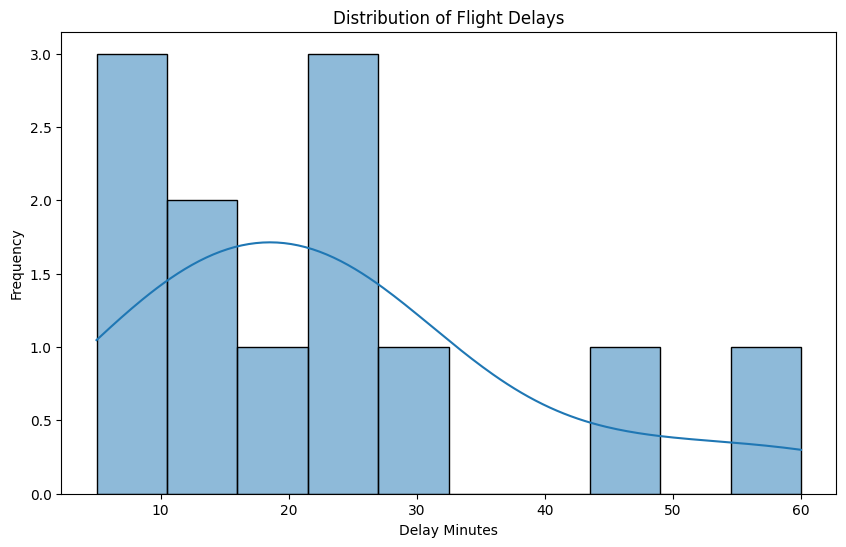

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['DelayMinutes'].dropna(), bins=10, kde=True)
plt.title('Distribution of Flight Delays')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')
# plt.savefig('Distribution of Flight Delays.png')
plt.show()

## **Analysis:**
- ### These statistics suggest that while most delays are around 23.75 minutes
- ### There is a significant variation, with some delays being much shorter and others much longer
- ### The median being close to the mean indicates a relatively symmetric distribution but the presence of a maximum value<br>of 60 minutes suggests there are some outliers and a right-skewed distribution.

## b. Calculate the average delay for each airline.

In [31]:
average_delay_by_airline = df.groupby('Airline')['DelayMinutes'].mean().reset_index()
print(average_delay_by_airline)

             Airline  DelayMinutes
0  American Airlines         30.00
1              Delta         12.50
2    United Airlines         28.75


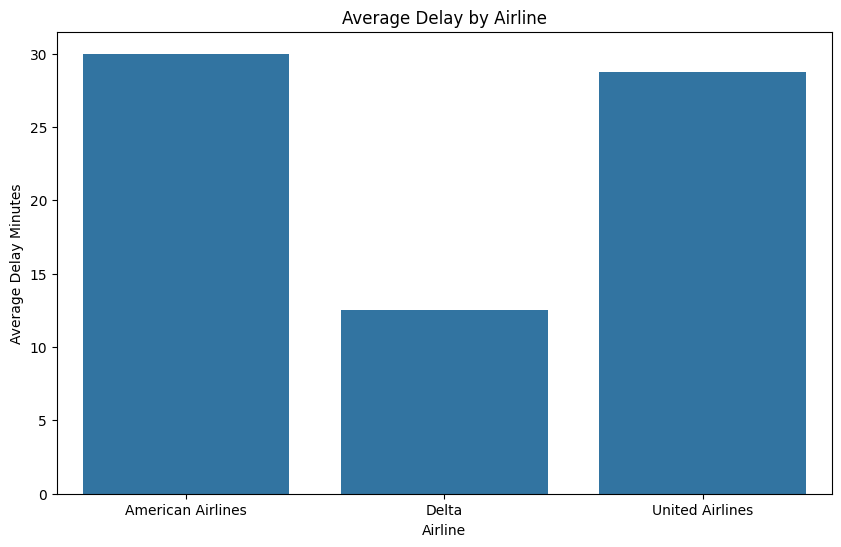

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='DelayMinutes', data=average_delay_by_airline)
plt.title('Average Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay Minutes')
# plt.savefig('Average Delay by Airline.png')
plt.show()

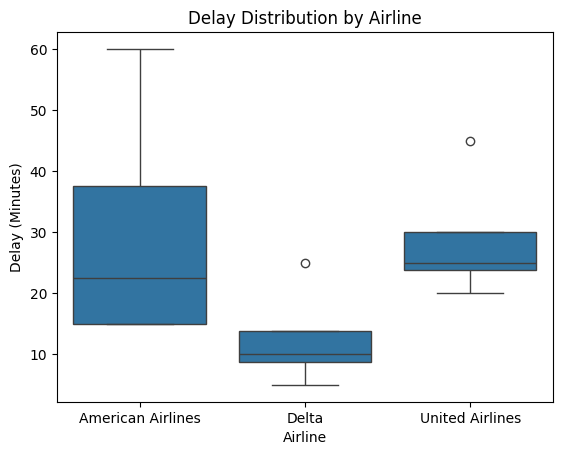

In [33]:
# Plot a boxplot to compare delay distributions across airlines
sns.boxplot(x='Airline', y='DelayMinutes', data=df)
plt.title('Delay Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay (Minutes)')
plt.savefig('Delay Distribution by Airline.png')
plt.show()

## **Analysis:**
- ### This suggests that Delta has the shortest average delay time
- ### while American Airlines has the longest.
- ### United Airlines falls in between but is closer to American Airlines in terms of delay duration.

## c. Identify any relationships between flight delays and departure times (e.g., are flights departing later in the day more likely to be delayed?).

In [34]:
df['DepartureHour'] = df['DepartureDatetime'].dt.hour
avg_delay_by_hour = df.groupby('DepartureHour')['DelayMinutes'].mean()
avg_delay_by_hour

DepartureHour
8     20.0
12    25.0
13     7.5
14    10.0
15    25.0
17    22.5
19    45.0
20    60.0
Name: DelayMinutes, dtype: float64

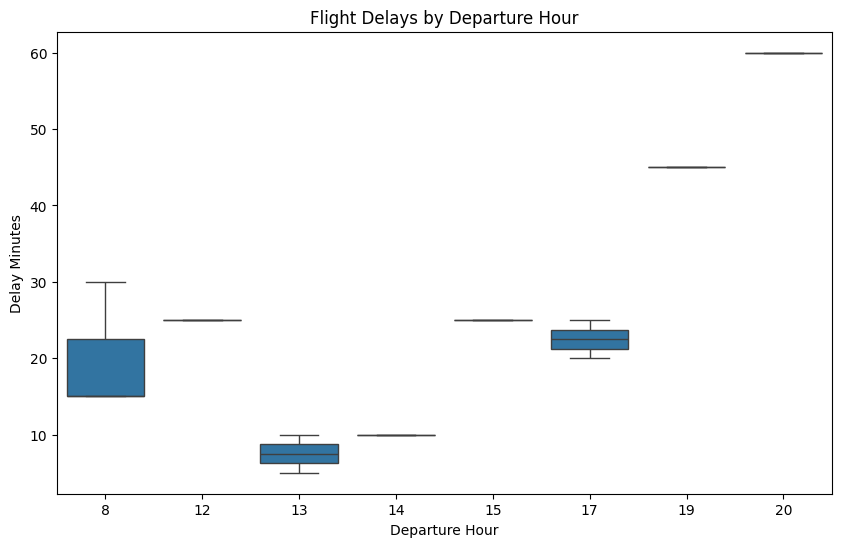

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DepartureHour', y='DelayMinutes', data=df)
plt.title('Flight Delays by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Delay Minutes')
# plt.savefig('Flight Delays by Departure Hour.png')
plt.show()

In [36]:
# dropping the 'DepartureHour' column as it's unnecessary
df.drop('DepartureHour', axis=1, inplace=True)

## **Analysis:**
- ### The highest delay occurs at 20:00 with 60 minutes.
- ### Significant delays are also observed at 19:00 (45.0 minutes) and 12:00 and 15:00 (both 25.0 minutes)
- ### The lowest delay is at 13:00 with 7.5 minutes
- ### Delays tend to increase significantly in the evening hours, particularly after 17:00


## **General Trend:**
- ### Delays tend to increase significantly in the evening hours, particularly after 17:00.
- ### Midday hours (12:00 - 15:00) show moderate delays, while early morning (8:00) and early afternoon (13:00 - 14:00) have relatively lower delays.


## **Possible Causes:**
- ### Evening delays could be due to accumulated delays throughout the day, higher traffic, or operational constraints.
- ### Lower delays in the early afternoon might indicate less congestion or more efficient operations during these hours.

## d. Determine if there is a significant difference in delays between different airlines.

In [37]:
# Filtering the data for each airline, ensuring that there are no NaN values in DelayMinutes
aa_delays = df[df['Airline'] == 'American Airlines']['DelayMinutes'].dropna()
delta_delays = df[df['Airline'] == 'Delta']['DelayMinutes'].dropna()
united_delays = df[df['Airline'] == 'United Airlines']['DelayMinutes'].dropna()

# performing ANOVA test to see if there's a significant difference in delays
anova_result = stats.f_oneway(aa_delays, delta_delays, united_delays)

# printing the ANOVA result
print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

# interpreting the p-value
if anova_result.pvalue < 0.05:
    print("There is a statistically significant difference in delays between airlines.")
else:
    print("There is no statistically significant difference in delays between airlines.")


ANOVA F-statistic: 1.765273311897106, p-value: 0.22554137150689818
There is no statistically significant difference in delays between airlines.


- I'm conducting an ANOVA test to check if there is a significant difference in flight delays between American Airlines, Delta, and United Airlines. 
- First, I filter out the delay data for each airline, ensuring no missing values. Then, I run the ANOVA test to compare the average delays across the three airlines.
- Based on the p-value, I interpret whether the delay differences are statistically significant.

In [38]:
# exporting cleaned and normalized dataset to CSV
df.to_csv('cleaned_normalized_aviation_data.csv', index=False)

# INSIGHTS:

### Potential causes:

1. **Time of day effect**:
   - Delays seem to increase as the day progresses, with evening flights experiencing the longest delays.
   - **Cause**: This could be due to a cumulative effect of earlier delays, air traffic congestion, or crew scheduling issues.

2. **Airline-specific factors**:
   - Different airlines show varying average delay times.
   - **Cause**: This might be due to differences in operational efficiency, fleet age, route network complexity, or scheduling practices.

3. **Airport or air traffic control (ATC) congestion**:
   - The pattern of increasing delays throughout the day could indicate growing congestion at airports or in airspace.

4. **Possible weather or seasonal effects**:
   - Without more context, we can't rule out weather as a contributing factor, especially for the longer delays.

### Recommendations:

1. **Improve schedule padding for later flights**:
   - Airlines could add more buffer time to evening flight schedules to account for the higher likelihood of delays.

2. **Enhance turnaround efficiency**:
   - Focus on improving ground operations, especially for airlines with higher average delays (American Airlines and United Airlines in this case).

3. **Implement better delay recovery strategies**:
   - Develop and employ more effective methods to catch up on time throughout the day to prevent delay accumulation.

4. **Optimize crew scheduling**:
   - Ensure crew rotations and scheduling take into account the higher likelihood of delays later in the day.

5. **Invest in predictive analytics**:
   - Use data-driven approaches to anticipate potential delays and proactively address them.

6. **Collaborate with ATC and airports**:
   - Work on solutions to reduce congestion during peak hours, possibly by adjusting flight schedules or improving air traffic management systems.

7. **Fleet management**:
   - For airlines with higher delays, consider reviewing their fleet composition and maintenance schedules to ensure they have the right aircraft available at the right times.

8. **Customer communication**:
   - Improve systems for keeping passengers informed about delays and their causes, which can help manage expectations and reduce frustration.